In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

## Daten vorbereiten ##

Datensatz MNIST ist bei tensorflow dabei

In [50]:
(X_train_orig, y_train), (X_test_orig, y_test) = mnist.load_data()
X_train_orig.shape

(60000, 28, 28)

Beispielbild aus Trainingsdatensatz anzeigen

4


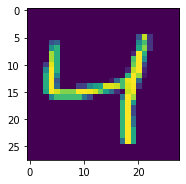

In [51]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(X_train_orig[2])
print(y_train[2])

Trick: mit reshape von Matrix zu Vektor (= erwartete Eingabe des NN) umwandeln

In [52]:
X_train = X_train_orig.reshape(X_train_orig.shape[0],28*28)
X_train = X_train /255.0
X_train.shape

(60000, 784)

## Modell bauen ##

In [53]:
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_dim=28*28))
model.add(Dense(19, activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 19)                2451      
Total params: 102,931
Trainable params: 102,931
Non-trainable params: 0
_________________________________________________________________


Modell mit Daten trainieren mit 10 Epochen. Eine Epoche ist eine Iteration über alle Eingaben.

In [54]:
model.fit(X_train, y_train, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 1s 643us/step - loss: 0.4023 - accuracy: 0.8966
Epoch 2/10
1875/1875 [==============================] - 1s 666us/step - loss: 0.1951 - accuracy: 0.9434
Epoch 3/10
1875/1875 [==============================] - 1s 639us/step - loss: 0.1429 - accuracy: 0.9582
Epoch 4/10
1875/1875 [==============================] - 1s 648us/step - loss: 0.1122 - accuracy: 0.9678
Epoch 5/10
1875/1875 [==============================] - 1s 620us/step - loss: 0.0903 - accuracy: 0.9735
Epoch 6/10
1875/1875 [==============================] - 1s 664us/step - loss: 0.0745 - accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 1s 718us/step - loss: 0.0619 - accuracy: 0.9824
Epoch 8/10
1875/1875 [==============================] - 1s 658us/step - loss: 0.0521 - accuracy: 0.9851
Epoch 9/10
1875/1875 [==============================] - 1s 623us/step - loss: 0.0438 - accuracy: 0.9884
Epoch 10/10
1875/1875 [==============================] - 1s 641u

## Evaluation ##

Reshape-Trick wie bei Trainingsdaten

In [55]:
X_test = X_test_orig.reshape(X_test_orig.shape[0],28*28)
X_test = X_test /255.0
X_test.shape

(10000, 784)

 Prädiktion auf Testdaten durchführen (_Hinweis: model.predict_classes(X_test) is deprecated_)

In [62]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

2


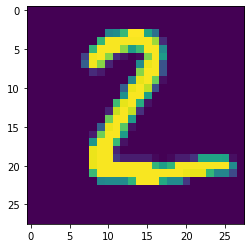

In [63]:
fig = plt.figure()
plt.imshow(X_test_orig[1])
print(y_test[1])

Metriken berechnen

In [64]:
correct_predictions = np.nonzero(y_pred == y_test)[0]
incorrect_predictions = np.nonzero(y_pred != y_test)[0]
print(len(correct_predictions)," classified correctly")
print(len(incorrect_predictions)," classified incorrectly")

9778  classified correctly
222  classified incorrectly


In [65]:
# Import Scikit-Learn
from sklearn.metrics import confusion_matrix

In [71]:
# Create Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[ 971,    0,    2,    1,    0,    0,    3,    1,    2,    0],
       [   0, 1126,    4,    0,    0,    1,    1,    0,    3,    0],
       [   4,    2, 1012,    2,    1,    0,    2,    2,    7,    0],
       [   0,    0,    3,  996,    1,    1,    0,    4,    3,    2],
       [   0,    0,    2,    1,  952,    0,    5,    4,    0,   18],
       [   3,    0,    0,   11,    2,  863,    4,    0,    6,    3],
       [   6,    3,    2,    1,    4,    5,  930,    0,    7,    0],
       [   1,    3,   13,    7,    0,    0,    0,  996,    0,    8],
       [   3,    0,    3,    7,    3,    3,    0,    3,  950,    2],
       [   2,    3,    0,    8,    3,    3,    0,    7,    1,  982]],
      dtype=int64)

In [76]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average=None)

(array([0.98080808, 0.99032542, 0.97214217, 0.96324952, 0.98550725,
        0.98515982, 0.98412698, 0.97935103, 0.97037794, 0.96748768]),
 array([0.99081633, 0.99207048, 0.98062016, 0.98613861, 0.9694501 ,
        0.96748879, 0.97077244, 0.9688716 , 0.97535934, 0.97324083]),
 array([0.9857868 , 0.99119718, 0.97636276, 0.97455969, 0.97741273,
        0.97624434, 0.9774041 , 0.97408313, 0.97286226, 0.97035573]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

In [79]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 699us/step - loss: 0.0723 - accuracy: 0.9778
Test loss: 0.07232661545276642
Test accuracy: 0.9778000116348267
